<a href="https://colab.research.google.com/github/IrisFDTD/OPTICS-UNIZAR/blob/main/Topic_7/chapter7_gauss_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **Optics - Chapter 7: Optical imaging**

---

# Image calculation and lateral magnification by Gauss's law (coupling of diopters)

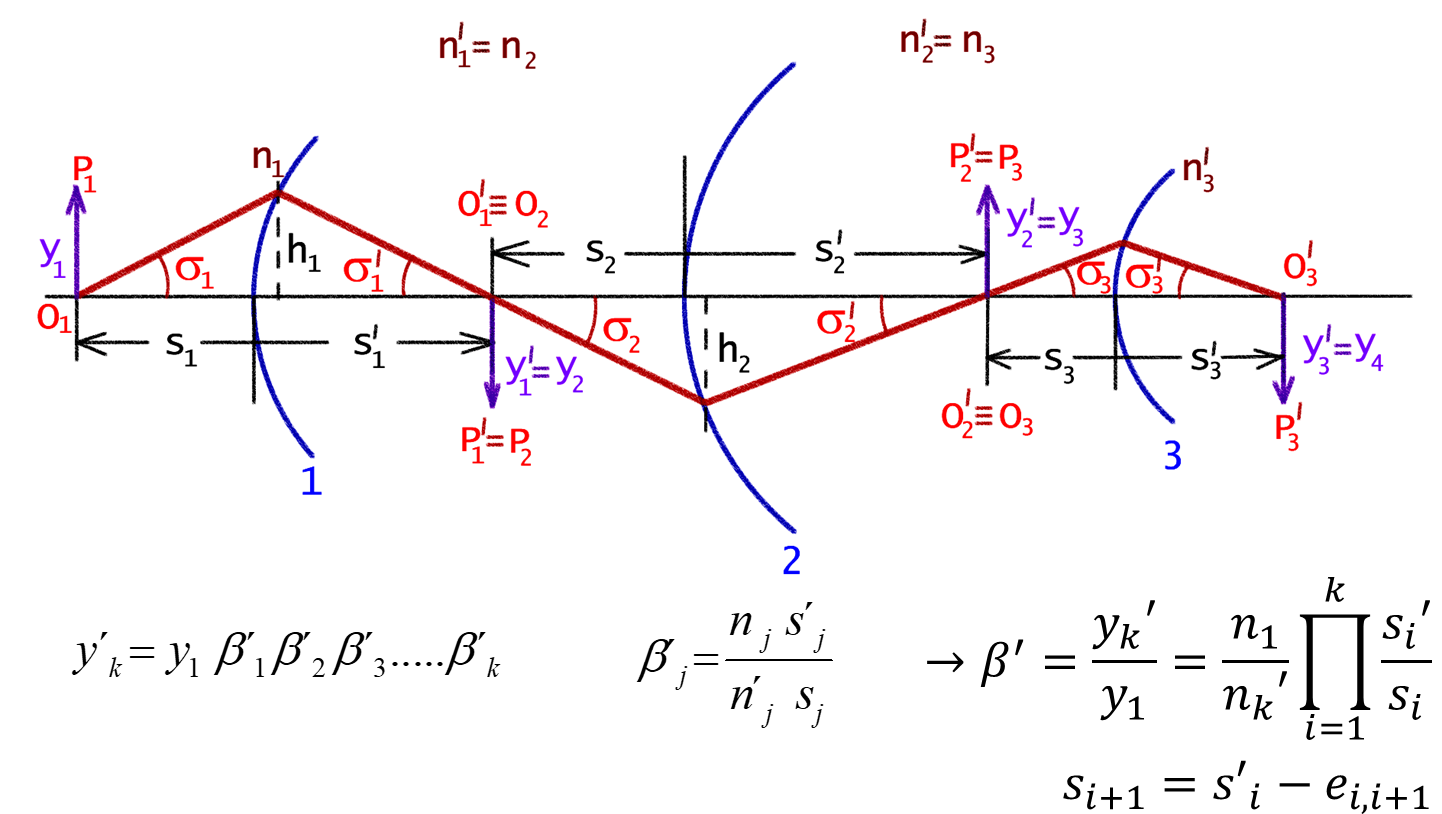

*Note that here we use $a,a'$ instead of $s,s'$ for the object-image locations*

# Definición de las leyes de la óptica paraxial mediante las leyes de Gauss (se derivan de las invariantes de Abbe y Lagrange-Helmoltz)

In [ ]:
class Sistema_optico_gauss(object):
    '''
    Clase Sistema_optico_gauss
    -------------------------
    Cálculo de la imagen y el aumento de un sistema
    compuesto.
    --------------------------------------------------------------------
    Inputs=Parámetros de la lente
      a1= posición respecto del primer vértice del objeto
      Para cada dioptrio:
      n=[] # Lista con los índices de refracción relativos de los N+1 medios
          # donde se incluye el primer medio (incidencia): [n1,n2,...nN+1]
      R=[] # Lista de los radios de los N dioptrios en mm: [R1,R2,...RN]
      e=[] # Lista de los N-1 distancias entre dióptrios en mm: [e12,e23,...eN-1,N]

    Longitud focal del vértice trasero/dorsal (último vértice)
    Se corresponde con la Thickness de la capa IMS en OSLO
    '''
    def __init__(self,nombre,n,R,e): # Función especial
        from math import inf
        self.nombre=nombre
        self.a1=-inf
        self.n=n[:]
        self.R=R[:]
        self.e=e[:]
        self.focal_img_v2=self.calc_lente_compuesta(self.a1)[0] # Se inician valores con a1=-inf

    def __str__(self): # Función especial
        print("\n --------------------------------")
        print("Parámetros sistema óptico: "+self.nombre)
        print("n=",self.n)
        print("R=",self.R)
        print("e=",self.e)
        return '{nombre}'.format(nombre=self.nombre)

    def aj_p(self,aj,Rj,nj,nj1):
      '''
      Ley de Gauss: Cálculo de la imagen para un solo dióptrio
      '''
      num=nj1
      den=nj/aj+(nj1-nj)/Rj
      return num/den

    def calc_img(self,a1):
      self.a1=a1
      '''
      Imagen y el aumento de un sistema
      compuesto
      '''
      print("Cálculo posición respecto vértice posterior ", len(self.R)," de la imagen y aumento para objeto a1=",a1,"mm")
      n=self.n
      R=self.R
      e=self.e
      aj=a1 # Objeto
      bjp=1.0
      for i in range(0,len(R)):
          ajp=self.aj_p(aj,R[i],n[i],n[i+1])
          bjp=(n[i]/n[i+1])*(ajp/aj)*bjp
          try:
            aj=ajp-e[i]
          except:
            pass
      return ajp,bjp

    def calc_lente_compuesta(self,a1):
      '''
      Cálculo de:
      - Poder refractor y focal de cada dióptrio
      - Imagen y el aumento de un sistema
      compuesto
      '''
      '''
      Longitud focal del vértice trasero/dorsal (último vértice)
      Se corresponde con la Thickness de la capa IMS en OSLO
      '''
      self.a1=a1
      n=self.n
      R=self.R
      e=self.e
      aj=a1 # Objeto
      bjp=1.0
      self.poder_refractor =[]
      self.focal=[]
      self.objeto=[]
      self.imagen=[]
      self.aumento=[]
      for i in range(0,len(R)):
          # Poder refractor de cada dioptrio
          self.poder_refractor.append((n[i+1]-n[i])/R[i])
          self.focal.append(n[i+1]*R[i]/(n[i+1]-n[i]))
          self.objeto.append(aj)
          ajp=self.aj_p(aj,R[i],n[i],n[i+1])
          self.imagen.append(ajp)
          bjp=(n[i]/n[i+1])*(ajp/aj)*bjp
          self.aumento.append(bjp)
          try:
            aj=ajp-e[i]
          except:
            pass
      return ajp,bjp

    def info_por_dioptrios(self,**kwargs):
      sentido_menos_inf=kwargs.get('menos_inf',True) # ¿De dónde viene la luz?
      if(sentido_menos_inf==True):
        print("\nEspacio IMAGEN (luz sentido -inf a +inf)")
        poderref_nombre="F'"
        focal_nombre="f'"
        potencia_nombre="P'"
      else:
        print("\nEspacio OBJETO (luz sentido +inf a -inf)")
        print("OJO: los vértices se corresponden con la lente girada 180º")
        poderref_nombre="F"
        focal_nombre="f"
        potencia_nombre="P"

      for i in range(0,len(self.focal)):
        print("vértice",i+1)
        print("\t Poder refractor ("+poderref_nombre+str(i+1)+"):"
        ,self.poder_refractor[i]*1e3,"m-1")
        print("\t Focal ("+focal_nombre+str(i+1)+"):",self.focal[i],"mm")
        print("\t Potencia ("+potencia_nombre+str(i+1)+"):",1.0/self.focal[i]*1e3,"m-1")
        print("\t objeto:",self.objeto[i],"mm")
        print("\t imagen:",self.imagen[i],"mm")
        print("\t aumento:",self.aumento[i])
      print("\n*distancias respecto del vértice correspondiente")
      pass

#  Funciones disponibles en la clase *Sistema Óptico Gauss*

In [ ]:
# Conocer los métodos de las distintas librerías
lib=Sistema_optico_gauss
method_list = [method for method in dir(lib) if method.startswith('__') is False]

print("Funciones disponibles en",lib.__name__)
for func in method_list:
  print("Función disponible:",func)

Funciones disponibles en Sistema_optico_gauss
Función disponible: aj_p
Función disponible: calc_img
Función disponible: calc_lente_compuesta
Función disponible: info_por_dioptrios


# Ejemplo 0: un único dioptrio

In [ ]:
'''
Longitud focal del vértice trasero/dorsal (último vértice)
'''
# Definición de los dióptrios refractivos
n=[1.0,1.5] # Índices de refracción relativos: [n1,n2,...]
R=[10.0]    # Radios de los dióptrios en mm: [R1,R2,...]
e=[0.0]     # Distancia entre dióptrios en mm: [e12,e23,...]

# Se crea el sistema óptico
dioptrio=Sistema_optico_gauss('dioptrio',n,R,e)

# Parámetros cargados
print(dioptrio)


 --------------------------------
Parámetros sistema óptico: dioptrio
n= [1.0, 1.5]
R= [10.0]
e= [0.0]
dioptrio


## Cálculo imagen para objeto a distancia finita

In [ ]:
'''
Ejemplo objeto-imagen
'''
a1=-50.0 # mm (OJO en OSLO se introducen distancias - quitar el signo)
print(dioptrio.calc_img(a1))

Cálculo posición respecto vértice posterior  1  de la imagen y aumento para objeto a1= -50.0 mm
(49.99999999999999, -0.6666666666666665)


## Caracterización completa (con objeto en menos infinito)

In [ ]:
# Información óptica del sistema
dioptrio.info_por_dioptrios()
print("Focal imagen (f'12,v2):",dioptrio.focal_img_v2,"mm")


Espacio IMAGEN (luz sentido -inf a +inf)
vértice 1
	 Poder refractor (F'1): 50.0 m-1
	 Focal (f'1): 30.0 mm
	 Potencia (P'1): 33.333333333333336 m-1
	 objeto: -inf mm
	 imagen: 30.0 mm
	 aumento: -0.0

*distancias respecto del vértice correspondiente
Focal imagen (f'12,v2): 30.0 mm


# Ejemplo 1: dos dioptrios acoplados (lente)

In [ ]:
'''
Longitud focal del vértice trasero/dorsal (último vértice)
'''
# Definición de los dióptrios refractivos
n=[1.0,1.5,1.0] # Índices de refracción relativos: [n1,n2,...]
R=[30.0,-30.0]  # Radios de los dióptrios en mm: [R1,R2,...]
e=[10.0]        # Distancia entre dióptrios en mm: [e12,e23,...]

# Se crea el sistema óptico
sist_1=Sistema_optico_gauss('sist_1',n,R,e)

# Parámetros cargados
print(sist_1)


 --------------------------------
Parámetros sistema óptico: sist_1
n= [1.0, 1.5, 1.0]
R= [30.0, -30.0]
e= [10.0]
sist_1


## Cálculo imagen para objeto a distancia finita

In [ ]:
'''
Ejemplo objeto-imagen
'''
a1=-50.0 # mm (OJO en OSLO se introducen distancias - quitar el signo)
print(sist_1.calc_img(a1))

Cálculo posición respecto vértice posterior  2  de la imagen y aumento para objeto a1= -50.0 mm
(74.5945945945946, -1.4594594594594594)


## Caracterización completa (con objeto en menos infinito)

In [ ]:
# Información óptica del sistema
sist_1.info_por_dioptrios()
print("Focal imagen (f'12,v2):",sist_1.focal_img_v2,"mm")


Espacio IMAGEN (luz sentido -inf a +inf)
vértice 1
	 Poder refractor (F'1): 16.666666666666668 m-1
	 Focal (f'1): 90.0 mm
	 Potencia (P'1): 11.11111111111111 m-1
	 objeto: -inf mm
	 imagen: 90.0 mm
	 aumento: -0.0
vértice 2
	 Poder refractor (F'2): 16.666666666666668 m-1
	 Focal (f'2): 60.0 mm
	 Potencia (P'2): 16.666666666666668 m-1
	 objeto: 80.0 mm
	 imagen: 28.235294117647058 mm
	 aumento: -0.0

*distancias respecto del vértice correspondiente
Focal imagen (f'12,v2): 28.235294117647058 mm


In [ ]:
print(sist_1)


 --------------------------------
Parámetros sistema óptico: sist_1
n= [1.0, 1.5, 1.0]
R= [30.0, -30.0]
e= [10.0]
sist_1


# Ejemplo 1: dos dioptrios acoplados (lente) - cálculo analítico (focal objeto e imagen para una lente)

+ Superficie 1 (dioptrio 1):
$\dfrac{1}{s'_1}=\dfrac{n_1}{n_1's_1}+\dfrac{n_1'-n_1}{n_1'r_1}$ (Eq. 1)

+ Superficie 2 (dioptrio 2) a distancia $e$ del primer dioptrio:
$\dfrac{1}{s'_2}=\dfrac{n_2}{n_2's_2}+\dfrac{n_2'-n_2}{n_2'r_2}$ (Eq. 2)

El acoplo entre las ecuaciones (1) y (2) es simplemente que $s_2=s_1'-e$

En una lente con índice de refracción en aire $n$ resulta que:
+ $n_1=n_2'=1$
+ $n_1'=n_2=n$

Entonces:
+ Para cálculo de focal objeto respecto del vértice del dioptrio 1 se impone que: $s_2' \rightarrow \infty$ (imagen que forma el sistema óptico en infinito)

+ Para cálculo de focal imagen respecto del vértice del dioptrio 2 se impone que: $s_1 \rightarrow -\infty$ (objeto del sistema óptico en infinito)

## Cálculo de focal objeto respecto del vértice del dioptrio 1

In [ ]:
def focal_objeto_primer_vertice_lente_aire(n,e,r1,r2):
  s1p=e+n*r2/(n-1)
  return r1*s1p/(n*r1+(1-n)*s1p)

focal_objeto_primer_vertice_lente_aire(n=1.5,e=10.0,r1=30.0,r2=-30.0)

-28.235294117647058

## Cálculo de focal imagen respecto del vértice del dioptrio 2

In [ ]:
def focal_imagen_segundo_vertice_lente_aire(n,e,r1,r2):
  s1p=n*r1/(n-1)
  s2=s1p-e
  return r2*s2/(n*r2+(1-n)*s2)

focal_imagen_segundo_vertice_lente_aire(n=1.5,e=10.0,r1=30.0,r2=-30.0)

28.235294117647058

# Ejemplo 2: acoplo de varios dioptrios (e.j. dos lentes acopladas)

In [ ]:
#2 lentes acopladas
n=[1.0,1.5,1.0,1.5,1.0] # Índices de refracción relativos: [n1,n2,n2,n3,n4,...]
R=[30.0,-30.0,30.0,-30.0] # Radios de los dióptrios en mm: [R1,R2,R3...]
e=[10.0,150.0,10]  # Distancia entre dióptrios en mm: [e12,e23,e34,...]

sist_2=Sistema_optico_gauss('Sistema compuesto de '+str(len(R)/2)+ ' lentes',n,R,e)
print(sist_2)


 --------------------------------
Parámetros sistema óptico: Sistema compuesto de 2.0 lentes
n= [1.0, 1.5, 1.0, 1.5, 1.0]
R= [30.0, -30.0, 30.0, -30.0]
e= [10.0, 150.0, 10]
Sistema compuesto de 2.0 lentes


## Cálculo imagen para objeto a distancia finita

In [ ]:
'''
Ejemplo objeto-imagen
'''
a1=-50.0 # mm (OJO en OSLO se introducen distancias - quitar el signo)
print(sist_2.calc_lente_compuesta(a1))
#Muestra el proceso por dioptrios
#Si no se llama primero a calc_lente_compuesta pinta el resultado para a1=-inf
print(sist_2.info_por_dioptrios())

(49.625884732052576, 0.9828109201213345)

Espacio IMAGEN (luz sentido -inf a +inf)
vértice 1
	 Poder refractor (F'1): 16.666666666666668 m-1
	 Focal (f'1): 90.0 mm
	 Potencia (P'1): 11.11111111111111 m-1
	 objeto: -50.0 mm
	 imagen: -449.9999999999999 mm
	 aumento: 5.999999999999998
vértice 2
	 Poder refractor (F'2): 16.666666666666668 m-1
	 Focal (f'2): 60.0 mm
	 Potencia (P'2): 16.666666666666668 m-1
	 objeto: -459.9999999999999 mm
	 imagen: 74.5945945945946 mm
	 aumento: -1.4594594594594594
vértice 3
	 Poder refractor (F'3): 16.666666666666668 m-1
	 Focal (f'3): 90.0 mm
	 Potencia (P'3): 11.11111111111111 m-1
	 objeto: -75.4054054054054 mm
	 imagen: 440.52631578947364 mm
	 aumento: 5.6842105263157885
vértice 4
	 Poder refractor (F'4): 16.666666666666668 m-1
	 Focal (f'4): 60.0 mm
	 Potencia (P'4): 16.666666666666668 m-1
	 objeto: 430.52631578947364 mm
	 imagen: 49.625884732052576 mm
	 aumento: 0.9828109201213345

*distancias respecto del vértice correspondiente
None


## Caracterización completa (con objeto en menos infinito)

In [ ]:
#Si no se llama primero a calc_lente_compuesta pinta el resultado para a1=-inf
print(sist_2.info_por_dioptrios())


Espacio IMAGEN (luz sentido -inf a +inf)
vértice 1
	 Poder refractor (F'1): 16.666666666666668 m-1
	 Focal (f'1): 90.0 mm
	 Potencia (P'1): 11.11111111111111 m-1
	 objeto: -50.0 mm
	 imagen: -449.9999999999999 mm
	 aumento: 5.999999999999998
vértice 2
	 Poder refractor (F'2): 16.666666666666668 m-1
	 Focal (f'2): 60.0 mm
	 Potencia (P'2): 16.666666666666668 m-1
	 objeto: -459.9999999999999 mm
	 imagen: 74.5945945945946 mm
	 aumento: -1.4594594594594594
vértice 3
	 Poder refractor (F'3): 16.666666666666668 m-1
	 Focal (f'3): 90.0 mm
	 Potencia (P'3): 11.11111111111111 m-1
	 objeto: -75.4054054054054 mm
	 imagen: 440.52631578947364 mm
	 aumento: 5.6842105263157885
vértice 4
	 Poder refractor (F'4): 16.666666666666668 m-1
	 Focal (f'4): 60.0 mm
	 Potencia (P'4): 16.666666666666668 m-1
	 objeto: 430.52631578947364 mm
	 imagen: 49.625884732052576 mm
	 aumento: 0.9828109201213345

*distancias respecto del vértice correspondiente
None
